# Projet 4 : # Projet 3 : Identifier les facteurs qui influencent les performances commerciales (Python ou R)

##  Problématique métier
  Une entreprise souhaite analyser les écarts de performance entre ses
 départements en explorant les relations entre variables qualitatives
 (départements, satisfaction) et quantitatives (scores de performance,
 heures travaillées).

## Objectif
 Valider les différences observées en appliquant des tests statistiques
 adaptés.

## 1.Chargement des bibliothèques

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [5]:
df_employee = pd.read_csv(r"C:\Users\mabou\Documents\12_projet_analyse_de_donnees\projet_4\Extended_Employee_Performance_and_Productivity_Data.csv", encoding='cp1252')

In [24]:
df_employee

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


## 2.Nétoyage des données

Valeurs manquantes

In [33]:
df_employee.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

Pas de données manquantes dans notre jeux de données.

Doublons

In [43]:
df_employee.duplicated().sum()

0

Pas de doublons dans le jeu de données

Information sur les données

In [47]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

## 3.Statistique descriptive

In [58]:
df_employee.describe(include='all')

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000
unique,NaN,9,3,NaN,7,3650,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Marketing,Male,NaN,Specialist,2020-09-29 08:03:05.556036,NaN,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,11216,48031,NaN,14507,46,NaN,50041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89990
mean,50000.500000,NaN,NaN,41.029410,NaN,NaN,4.476070,NaN,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088,NaN
std,28867.657797,NaN,NaN,11.244121,NaN,NaN,2.869336,NaN,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719,NaN
min,1.000000,NaN,NaN,22.000000,NaN,NaN,0.000000,NaN,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
25%,25000.750000,NaN,NaN,31.000000,NaN,NaN,2.000000,NaN,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000,NaN
50%,50000.500000,NaN,NaN,41.000000,NaN,NaN,4.000000,NaN,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000,NaN
75%,75000.250000,NaN,NaN,51.000000,NaN,NaN,7.000000,NaN,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000,NaN


## 4.Khi-deux (Chi-Square Test)
 La satisfaction des employés dépend-elle du
 département ?

In [64]:
df_sous_categorie = df_employee[['Department', 'Employee_Satisfaction_Score']]

In [74]:
df_sous_categorie = df_sous_categorie.groupby(['Department', 'Employee_Satisfaction_Score']).count()
df_sous_categorie

,
Department,Employee_Satisfaction_Score
Customer Support,32992.78
Engineering,32899.82
Finance,33644.31
HR,32826.39
IT,33651.74
Legal,33187.57
Marketing,33581.45
Operations,33832.92
Sales,33291.86


In [80]:
bins = np.linspace(1,5,num=4)
labels = ['insatisfait', 'satisfait', 'tres satisfait']

In [82]:
df_employee['Catégorie_satisfaction'] = pd.cut(df_employee['Employee_Satisfaction_Score'], bins=bins, labels=labels)

In [84]:
df_employee['Catégorie_satisfaction'].head()

0      satisfait
1    insatisfait
2      satisfait
3    insatisfait
4    insatisfait
Name: Catégorie_satisfaction, dtype: category
Categories (3, object): ['insatisfait' < 'satisfait' < 'tres satisfait']

In [86]:
df_satisfaction = df_employee[['Department', 'Catégorie_satisfaction']]

In [110]:
tableau_avec_marges = pd.crosstab(
    df_employee['Department'], 
    df_employee['Catégorie_satisfaction'], 
)

In [112]:
tableau_avec_marges

Catégorie_satisfaction,insatisfait,satisfait,tres satisfait
Department,,,
Customer Support,3785,3716,3599
Engineering,3605,3703,3633
Finance,3668,3762,3752
HR,3682,3687,3579
IT,3631,3686,3801
Legal,3726,3708,3663
Marketing,3727,3810,3664
Operations,3577,3790,3800
Sales,3743,3654,3706


In [114]:
chi2, p_value, dof, expected = chi2_contingency(tableau_avec_marges)

print(f"Statistique Khi-deux : {chi2:.3f}")
print(f"P-value : {p_value:.4f}")
print(f"Degrés de liberté : {dof}")
print("Fréquences attendues sous H0 :\n", expected)

Statistique Khi-deux : 24.367
P-value : 0.0818
Degrés de liberté : 16
Fréquences attendues sous H0 :
 [[3684.25248105 3725.60361317 3690.14390579]
 [3631.47805362 3672.23685871 3637.28508768]
 [3711.46948136 3753.12609031 3717.40442833]
 [3633.80145608 3674.58633846 3639.61220545]
 [3690.22694453 3731.64513254 3696.12792293]
 [3683.25673713 3724.59669327 3689.14656959]
 [3717.77585948 3759.50324965 3723.72089087]
 [3706.49076179 3748.09149083 3712.41774738]
 [3685.24822496 3726.61053306 3691.14124198]]


Avec une p-value = 0.0818>0.05 nous pouvons conclure que la satisfaction des employés est indépendante du département.

In [117]:
n = tableau_avec_marges.sum().sum()  # Effectif total
min_dim = min(tableau_avec_marges.shape) - 1  # min(r-1, c-1)

V = np.sqrt(chi2 / (n * min_dim))

print(f"V de Cramer = {V:.3f}")

V de Cramer = 0.011


ceci nous montre une association faible entre la satisfaction des employés et leur département.

## 5. ANOVA (Analyse de Variance)

Les scores de performance diffèrent-ils selon le département ?

In [41]:
from scipy.stats import f_oneway

In [43]:
import statsmodels.api as sm

In [45]:
from statsmodels.formula.api import ols

In [68]:
from scipy import stats

In [47]:
moore_lm = ols('Performance_Score ~ C(Department)',data=df_employee).fit()

In [53]:
table = sm.stats.anova_lm(moore_lm, typ=2)

In [55]:
print(table)

                     sum_sq       df         F    PR(>F)
C(Department)      15.33215      8.0  0.957562  0.467323
Residual       200127.57936  99991.0       NaN       NaN


In [35]:
df_employee['Department'].unique()

array(['IT', 'Finance', 'Customer Support', 'Engineering', 'Marketing',
       'HR', 'Operations', 'Sales', 'Legal'], dtype=object)

In [57]:
f_oneway(df_employee['Performance_Score'][df_employee['Department'] == 'IT'], df_employee['Performance_Score'][df_employee['Department'] == 'Finance'], 
         df_employee['Performance_Score'][df_employee['Department'] == 'Customer Support'],df_employee['Performance_Score'][df_employee['Department'] == 'Engineering'],
        df_employee['Performance_Score'][df_employee['Department'] == 'Marketing'],df_employee['Performance_Score'][df_employee['Department'] == 'HR'],
        df_employee['Performance_Score'][df_employee['Department'] == 'Operations'],df_employee['Performance_Score'][df_employee['Department'] == 'Sales'],
        df_employee['Performance_Score'][df_employee['Department'] == 'Legal'])

F_onewayResult(statistic=0.9575622805473877, pvalue=0.467322553218532)

La statistique du test F est de 0.9576 et la valeur p correspondante est de 0,4673. Puisque la valeur p n’est pas inférieure à 0,05, nous ne parvenons pas à rejeter l’hypothèse nulle. Cela signifie que nous n’avons pas suffisamment de preuves pour affirmer qu’il existe une différence dans les scores de performance entre les départements.

## 6. Tests de normalité

**Shapiro-Wilk**: Vérifie si un échantillon suit une distribution  normale.

In [70]:
shapiro_test = stats.shapiro(df_employee['Performance_Score'])

C:\Users\mabou\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [72]:
shapiro_test

ShapiroResult(statistic=0.8878214015663503, pvalue=1.8100190486204432e-115)

La valeur p du test est de 1.8100190486204432e-115 . Puisque cette valeur est inférieure à 0,05, nous disposons de suffisamment de preuves pour affirmer que les Scores de Performence ne proviennent pas d’une population normalement distribuée.

In [74]:
shapiro_test_1 = stats.shapiro(df_employee['Monthly_Salary'])

C:\Users\mabou\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [76]:
shapiro_test_1

ShapiroResult(statistic=0.9723631207982821, pvalue=7.683399663207692e-80)

La valeur p du test est de 7.683399663207692e-80. Puisque cette valeur est inférieure à 0,05, nous disposons de suffisamment de preuves pour affirmer que le Salaire mensuel ne proviennent pas d’une population normalement distribuée.

In [81]:
shapiro_test_2 = stats.shapiro(df_employee['Work_Hours_Per_Week'])

C:\Users\mabou\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [83]:
shapiro_test_2

ShapiroResult(statistic=0.9523560335496379, pvalue=6.745434886603268e-93)

La valeur p du test est de 7.683399663207692e-80. Puisque cette valeur est inférieure à 0,05, nous disposons de suffisamment de preuves pour affirmer que les heures de travail hebdomadaire ne proviennent pas d’une population normalement distribuée.

## 7. Visualisation

**Box plot**

<Axes: ylabel='Monthly_Salary'>

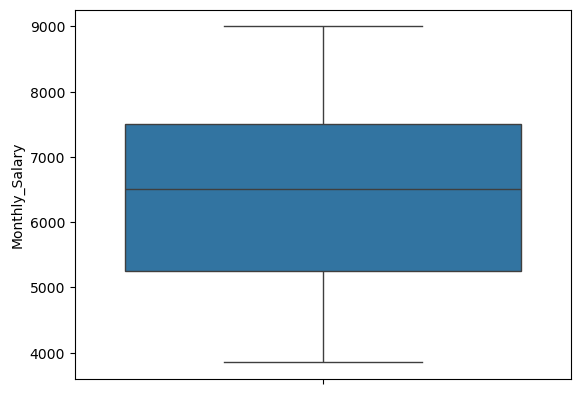

In [100]:
sns.boxplot(data=df_employee, y="Monthly_Salary")

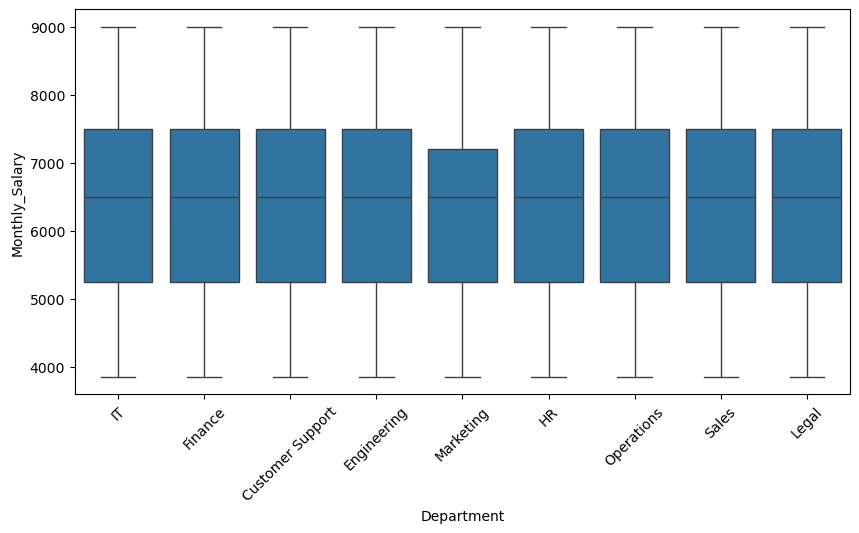

In [124]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_employee, x="Department", y="Monthly_Salary")
plt.xticks(rotation=45)
plt.show()

Ce graphique nous permet de conclure que la distribution des salaires est la même dans tous les départements.

**Barplot**

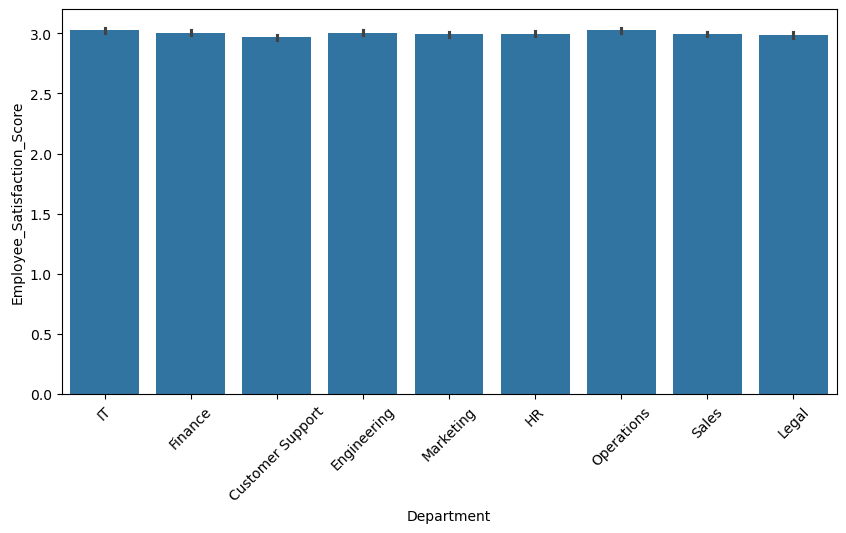

In [135]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_employee, x="Department", y="Employee_Satisfaction_Score")
plt.xticks(rotation=45)
plt.show()

Ce graphique nous permet de conclure que le score de satisfaction des employés est globalement le même dans tous les départements.

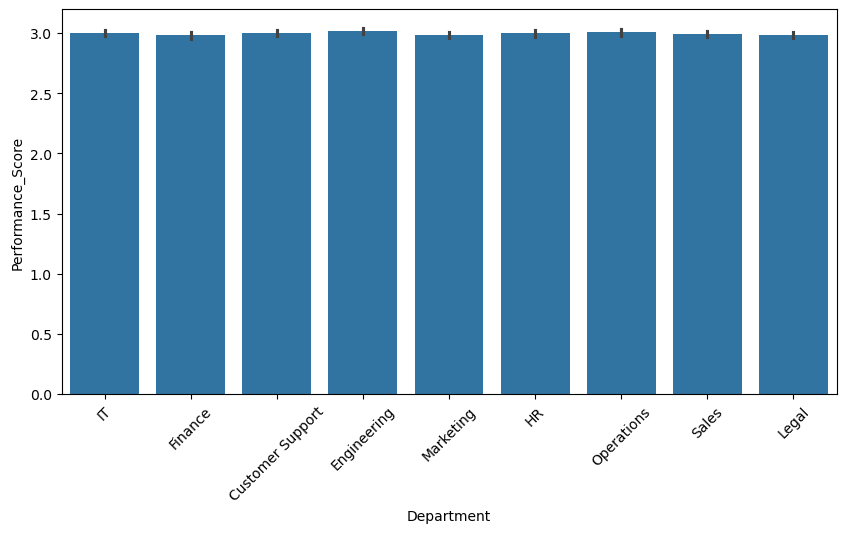

In [140]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_employee, x="Department", y="Performance_Score")
plt.xticks(rotation=45)
plt.show()

Ce graphique nous permet de conclure que le score de Performance est globalement le même dans tous les départements.